In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import markov_clustering as mc
import networkx as nx

In [3]:
cluster_colors = [np.random.randint(64, 256, 3) for i in range(10000)]

In [420]:
nodes = pd.read_json(r"..\bin\Debug\netcoreapp2.2\maps2\prob-100.graph", orient='records', lines = True)

In [ ]:
for p in range(1, 301):
    print(p)
    nodes = pd.read_json(r"..\bin\Debug\netcoreapp2.2\maps2\prob-" + f"{p:03d}" + ".graph", orient='records', lines = True)
    nodes = nodes.sort_values('Id')
    nodes['cluster_0'] = nodes.Id
    edges = pd.DataFrame(np.repeat(nodes.Id, nodes.apply(lambda x: len(x.ConnectedIds), axis = 1)))
    edges['connectedId'] = np.concatenate(np.array(nodes.ConnectedIds))
    
    clusters_count = 6
    j=1
    while clusters_count > 5:
        old_cluster_field = f"cluster_{j-1}"
        new_cluster_field = f"cluster_{j}"

        id_nodes = nodes.set_index('Id')
        edges['cluster1'] = np.array(id_nodes.loc[edges.Id][old_cluster_field])
        edges['cluster2'] = np.array(id_nodes.loc[edges.connectedId][old_cluster_field])

        edges_strength=edges.groupby(['cluster1', 'cluster2']).size().reset_index()
        edges_strength=edges_strength[edges_strength.cluster1 != edges_strength.cluster2]

        graph = nx.Graph()
        graph.add_weighted_edges_from(edges_strength.apply(lambda x: (x.cluster1, x.cluster2,1), axis = 1))

        matrix = nx.adjacency_matrix(graph, nodelist=np.arange(0, nodes[old_cluster_field].max() + 1))
        result = mc.run_mcl(matrix, inflation=2, expansion=2, iterations=100)
        clusters = mc.get_clusters(result)
        clusters_count = (len(clusters))
        print(clusters_count)
        nodes_clusters = np.zeros(nodes[old_cluster_field].max() + 1, dtype=int)

        for i in range(len(clusters)):
            nodes_clusters[list(clusters[i])] = i
        nodes[new_cluster_field] = nodes[old_cluster_field].map(lambda x: nodes_clusters[x])
        nodes[new_cluster_field+'_color'] = nodes[new_cluster_field].map(lambda i: cluster_colors[i])

        j += 1
    
    clusters_columns = [col for col in nodes.filter(like = 'cluster_').columns if not 'color' in col][1:]
    nodes['cluster_hierarchy'] = nodes.apply(lambda x: [x[c] for c in clusters_columns],axis = 1)
    nodes[['Id', 'X', 'Y', 'cluster_hierarchy']].to_json(r"..\bin\Debug\netcoreapp2.2\clusters.v2\prob-" + str(p) + ".clusters", orient='records', lines = True)

1
2
2
67
14
6
2
3
36
9
2
4
74
15
6
2
5
35
8
2
6
23
6
2
7
26
6
2
8
33
9
4
9
20
5
10
63
17
4
11
51
13
6
2
12
51
13
5
13
52
16
4
14
48
8
3
15
49
12
4
16
52
12
4
17
55
14
6
3
18
52
12
4
19
48
12
4
20
51
14
6
2
21
142
34
11
3
22
85
20
5
23
133
34
12
4
24
127
30
10
4
25
86
18
5
26
124
38
11
5
27
162
34
13
5
28
140
29
10
4
29


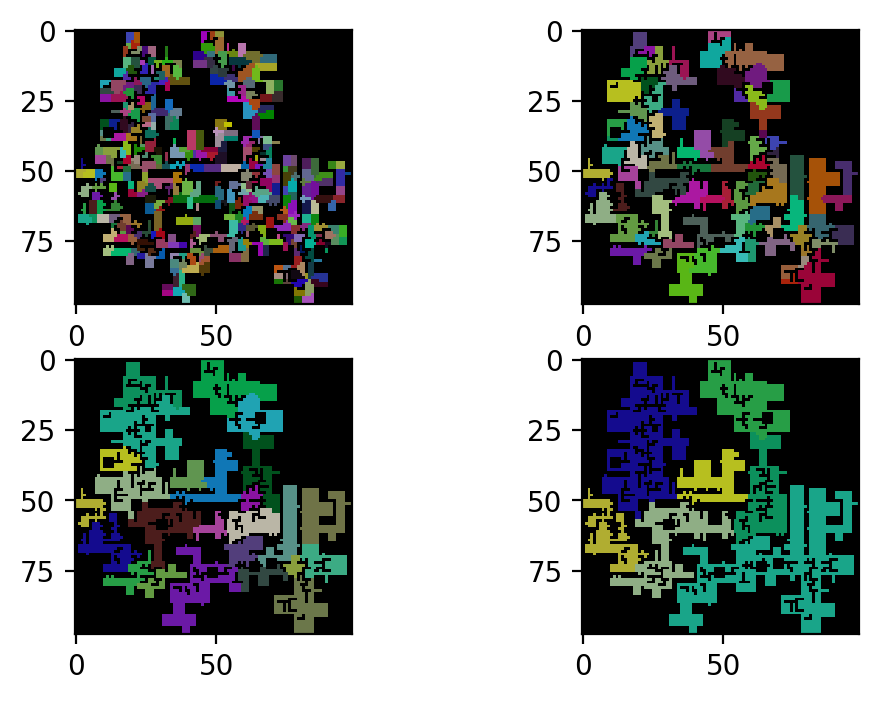

In [412]:
for i in range(1, 5):
    plt.subplot(2, 2, i)
    image = np.zeros((nodes.X.max() + 1, nodes.Y.max() + 1, 3))
    for node in nodes.iterrows():
        image[node[1].X, node[1].Y] = node[1][f'cluster_{i}_color']
    plt.imshow(image[:,:])
plt.show()

In [149]:
edges = pd.DataFrame(np.repeat(nodes.Id, nodes.apply(lambda x: len(x.ConnectedIds), axis = 1)))
edges['connectedId'] = np.concatenate(nodes.ConnectedIds)

In [150]:
id_nodes = nodes.set_index('Id')
edges['cluster1'] = np.array(id_nodes.loc[edges.Id].cluster)
edges['cluster2'] = np.array(id_nodes.loc[edges.connectedId].cluster)
edges_strength=edges.groupby(['cluster1', 'cluster2']).size()

matrix = nx.adjacency_matrix(graph, nodelist=np.arange(0, nodes.cluster.max()+1))
result = mc.run_mcl(matrix, inflation=2, expansion=2, iterations=400)
clusters = mc.get_clusters(result) 

In [151]:
nodes_clusters = np.zeros(id_nodes.loc[edges.Id].cluster.max()+1, dtype=int)
for i in np.arange(len(clusters)):
    nodes_clusters[list(clusters[i])] = i

In [152]:
nodes['cluster_2'] = nodes.cluster.map(lambda i: nodes_clusters[i])
nodes['cluster_2_color'] = nodes.cluster_2.map(lambda i: cluster_colors[i])